In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mig
import os
gpu_=tf.test.gpu_device_name()
tf.device(gpu_)

In [2]:
PATH = "./PokemonData/"
classes = os.listdir(PATH) #define classes for data
#normalize data
data = ImageDataGenerator(rescale = 1./255)
train_data = data.flow_from_directory(PATH,target_size=(128,128),batch_size=4)

Found 6821 images belonging to 150 classes.


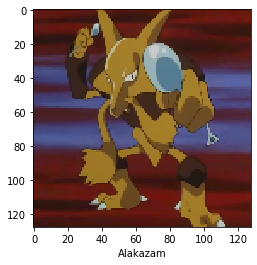

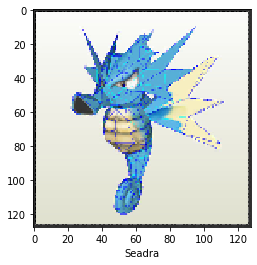

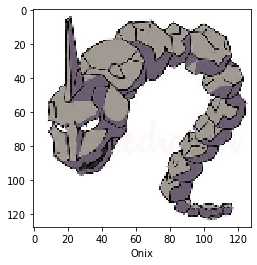

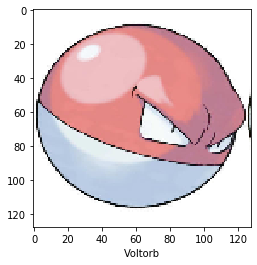

In [3]:
sample_x,sample_y = next(train_data)
for x,y in zip( sample_x,sample_y ):
  plt.imshow(x)
  plt.xlabel(classes[y.argmax()])
  plt.show()

In [4]:
#create model
img_shape=(128,128,3)

model = keras.Sequential()
model.add(keras.layers.Conv2D(64, 3, input_shape=(img_shape), activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32,3,strides=(2,2),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(len(classes),activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1843456   
_________________________________________________________________
dense_1 (Dense)              (None, 150)               3

In [5]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy']
             )

hist = model.fit(train_data,epochs=20)

  ...
    to  
  ['...']
Train for 1706 steps
Epoch 1/20
1706/1706 [==============================] - 29s 17ms/step - loss: 5.0144 - accuracy: 0.0076
Epoch 2/20
1706/1706 [==============================] - 28s 16ms/step - loss: 4.9149 - accuracy: 0.0257
Epoch 3/20
1706/1706 [==============================] - 29s 17ms/step - loss: 3.3285 - accuracy: 0.2708
Epoch 4/20
1706/1706 [==============================] - 28s 17ms/step - loss: 1.4177 - accuracy: 0.6572
Epoch 5/20
1706/1706 [==============================] - 29s 17ms/step - loss: 0.4750 - accuracy: 0.8829
Epoch 6/20
1706/1706 [==============================] - 29s 17ms/step - loss: 0.1845 - accuracy: 0.9611
Epoch 7/20
1706/1706 [==============================] - 28s 16ms/step - loss: 0.1253 - accuracy: 0.9727
Epoch 8/20
1706/1706 [==============================] - 28s 17ms/step - loss: 0.1204 - accuracy: 0.9735
Epoch 9/20
1706/1706 [==============================] - 28s 16ms/step - loss: 0.1106 - accuracy: 0.9752
Epoch 10/20
1706/1

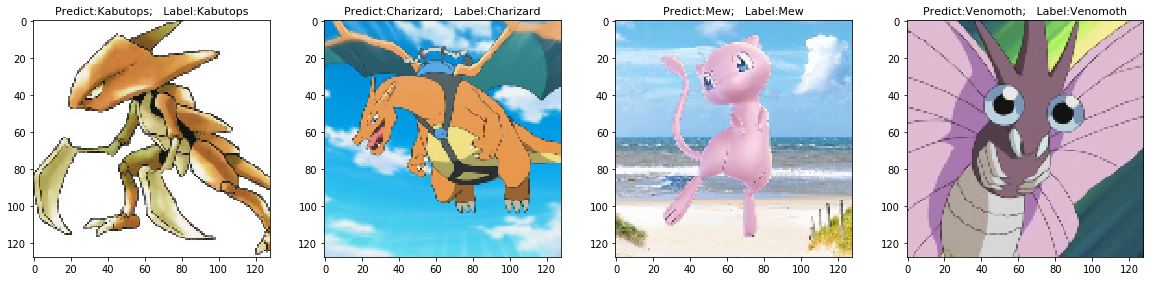

In [6]:
plt.figure(figsize=(20,20))
#for _ in range(3):
sam_x,sam_y = next(train_data) 
pred_ = model.predict(sam_x)
for i in range(len(sam_x)):
    pred,y = pred_[i].argmax(), sam_y[i].argmax()
    plt.subplot(4,4,i+1)
    plt.imshow(sam_x[i])
    title_ = 'Predict:' + str(classes[pred])+ ';   Label:' + str(classes[y])
    plt.title(title_,size=11)
plt.show()

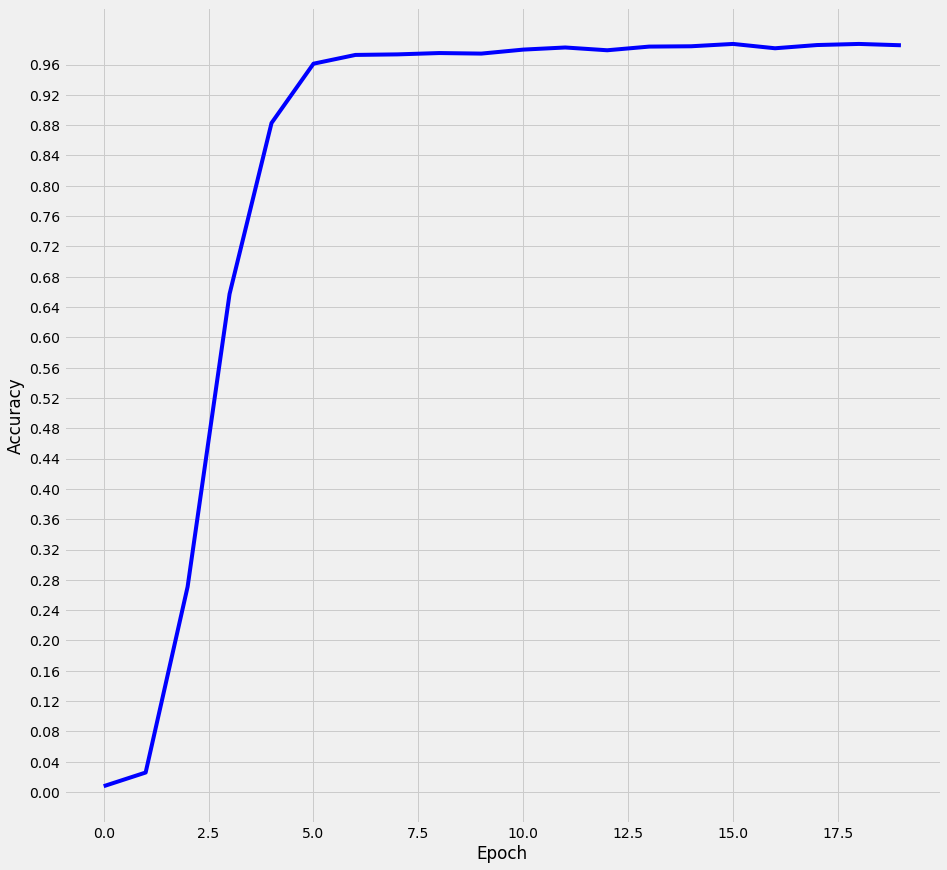

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,14))
plt.plot(hist.history['accuracy'],label='accuracy',color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1, step=0.04))
plt.show()
model.save("cnn-pokemon.h5")